<a href="https://colab.research.google.com/github/rpizarrog/innovacion-empresarial/blob/main/notebook_python/Caso_22_Perceptr%C3%B3n_para_evaluar_opinicones_de_calidad_de_compra_de_ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Objetivo

Crear y entrenar un modelo basado en el algoritmo de un perceptrón utilizando librería Scikit-learn para evaluar la exactitud de opinones de calidad por parte de los clientes en la compra de ropa.


# Fundamento teórico

Pendiente ...


# Desarrollo



## Cargar librerías



In [14]:
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split # PAra partir datos de entrenamiento y validación


from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix # Para matiz de confusión...

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import ipywidgets as widgets
from IPython.display import display, HTML, clear_output


import time # Para medir el tiempo de ejecución

import matplotlib.pyplot as plt

## Crear funciones

pendientes

In [28]:
def f_diagrama_barra(datos):
    conteo = datos['Calidad'].value_counts()
    colores = ['green', 'yellow', 'red']  # Colores para las barras

    # Crear el gráfico de barras con colores específicos
    plt.figure(figsize=(8, 6))
    barras = plt.bar(conteo.index, conteo.values, color=colores)

    # Añadir etiquetas con la frecuencia en cada barra
    for barra in barras:
        yval = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2, yval, int(yval), ha='center', va='bottom')

    plt.title('Total de opiniones sobre calidad')
    plt.xlabel('Daño al Corazón (1: Buena, 2: Regular, 3: Mala)')
    plt.ylabel('Total de Casos')
    plt.xticks(ticks=[1, 2, 3], labels=['Buena', 'Regular', 'Mala'], rotation=0)
    plt.show()

# Esta función recibe el modelo, los datos de validación y la variable objetivo;
# presenta la matriz de confusión así como
# el estadísitico accuracy que sirve para evaluar la exactitud del modelo de clasificación
def f_evaluar_modelo(predicciones, y_test):

  # Hay que hacer predicciones
  # predicciones = modelo.predict(datos_validacion)

  # Calcular la precisión
  precision = accuracy_score(y_test, predicciones)
  print(f"La exactitud del modelo es: {precision}")

  # Opcional: Mostrar la matriz de confusión
  matriz_confusion = confusion_matrix(y_test, predicciones)
  print("Matriz de Confusión:")
  print(matriz_confusion)

  # Extraer los valores de la matriz de confusión
  VP = matriz_confusion[0, 0]
  FN = matriz_confusion[0, 1]
  FP = matriz_confusion[1, 0]
  VN = matriz_confusion[1, 1]

  print ()
  print ("VP: Verdaderos Positivos. El modelo la atina (V) a los que no ('No') tienen daño al corazón: ", VP)
  print ("FN: Falsos Negativos. El modelo falla (F) a los que no ('No') daño, prediciendo que si ('Yes') tienen daño al corazón: ", FN)
  print ("FP: Falsos Positivos. El modelo falla (F) a los que si ('Yes') daño, prediciendo que no ('No) tienen daño al corazón: ", FP)
  print ("VN: Verdaderos Negativos. El modelo le atina (V) a los que si ('Yes') tienen daño al corazón: ", VN)

  print ("Compronando")
  print ("Accuracy = (VP + VN)/(VP + FN + FP + VN)",
         "(",VP, "+", VN,") / (",VP,"+",FN,"+",FP,"+",VN,") = ", (VP + VN)/(VP + FN + FP + VN))


## Crear widgets



In [11]:
visualizar = widgets.Output()


# Función para actualizar y mostrar el contenido dinámicamente en el widget de salida
def f_visualizar_datos(datos1, datos2, titulo1, titulo2):
    with visualizar:
        #global titulo1, titulo2
        #titulo1 = "Primeros 20 registros de datos"
        visualizar.clear_output(wait=True)  # Limpiar el contenido anterior
        display(HTML(f"<h2>{titulo1}</h2>"))  # Establecer el nuevo título
        # Visualizar datos
        display(datos1)

        #titulo2 = "Últimos 20 registros de datos"
        display(HTML(f"<h2>{titulo2}</h2>"))  # Establecer el nuevo título
        # Visualizar datos
        display(datos2)

## Cargar datos

## Las variables de interés

Se carga un conjunto de datos que contiene oiniones de calidad que se resumen en una clasificación de tres tipos "Buena", "Regular y "Mala"

Las variables independientes son:

* Tipo_Prenda: Pantalón Vestido, Falda, Camisa, otros...
* Género: Caballero o Dama
* Color: Algún color de prenda; Roho, Blanco, Verde Azul...
* Estilo: Foral, Casua, Deportivo
* Marca: Marca A, B, C, D
* Precio. Valor económico de la prenda $$$
Talla	: Valor numérico; 38, 40, 29, 43, ...
Cantidad_Lavados: Número de lavadas que ha tenido la prenda desues de compra que el cliente sabe. Valor numérico
* Edad: Edad del cliente
* Profesión: Profesión del cliente; Ciencias Sociales y Humanidades, Ingeniería, Artes, ...
* Género_Incluyente	: HombreMujer, Hombre, Mujer

La variable dependiente es
* Calidad: Buena, Regular, Mala

In [18]:
# Carga el archivo CSV
ruta = 'https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/main/datos/opiniones_calidad_prendas_ropa_equidad.csv'  # Actualiza con la ruta correcta
datos = pd.read_csv(ruta)

# Tamaño de la muestra deseado, por ejemplo, 1000 registros
# n = 2500 # Mitad de los datos
# muestra = datos.sample(n=n, random_state=2024)

# Llamar a la función para mostrar datos de entrenamiento ordenados por índice
f_visualizar_datos(datos.head(20), datos.tail(20), "Primeros registros de Datos", "Últimos registros de Datos")

# Para mostrar el widget de salida
display(visualizar)

Output()

## Descripción de datos



In [26]:
# Obtener el conteo de casos con y sin daños al corazón
conteo_calidad = datos['Calidad'].value_counts()

# Convertir el conteo a un DataFrame para una mejor visualización
tabla_conteo = conteo_calidad.rename(index={1: 'Buena', 2: 'Regular', 3: 'Mala'}).reset_index()
tabla_conteo.columns = ['Calidad', 'Total de Casos']

# Mostrar la tabla
print(tabla_conteo)

   Calidad  Total de Casos
0    Buena            2522
1  Regular            1467
2     Mala            1011


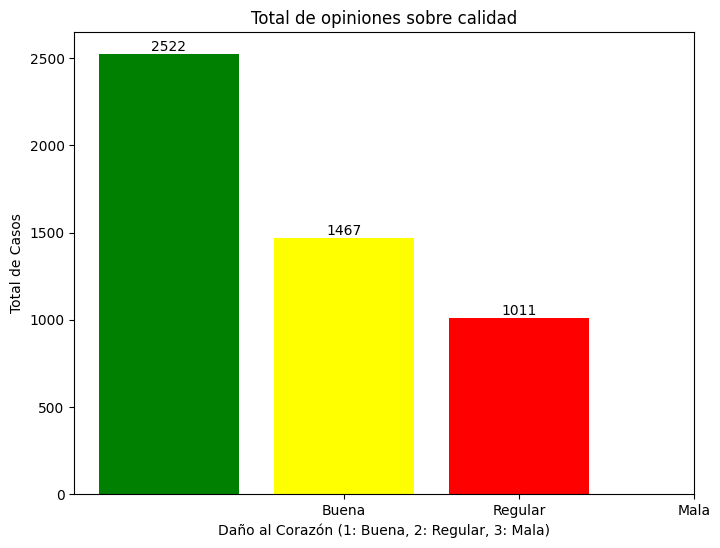

In [27]:
f_diagrama_barra(datos)

## Preparando los datos

Convertir las variables cualitativas a valores codificados, y dejar todo el conjunto de datos en un solo llamado datos_preparados

In [29]:
# Preprocesamiento: Codificación de variables categóricas
encoder = OneHotEncoder(sparse=False)
# Instanciar un LabelEncoder
encoder = LabelEncoder()

datos_preparados = pd.DataFrame()
# Aplicar Label Encoding a cada columna categórica y guardar en el mismo DataFrame
datos_preparados['Tipo_Prenda'] = encoder.fit_transform(datos['Tipo_Prenda'])
datos_preparados['Género'] = encoder.fit_transform(datos['Género'])
datos_preparados['Color'] = encoder.fit_transform(datos['Color'])
datos_preparados['Estilo'] = encoder.fit_transform(datos['Estilo'])
datos_preparados['Marca'] = encoder.fit_transform(datos['Marca'])
datos_preparados['Precio'] = encoder.fit_transform(datos['Precio'])
datos_preparados['Género_Incluyente'] = encoder.fit_transform(datos['Género_Incluyente'])
datos_preparados['Profesión'] = encoder.fit_transform(datos['Profesión'])
datos_preparados['Calidad'] = encoder.fit_transform(datos['Calidad'])


# Llamar a la función para mostrar datos
f_visualizar_datos(datos_preparados.head(20), datos_preparados.tail(20), "Primeros registros de Datos Preparados", "Últimos registros de Datos Preparados")

# Para mostrar el widget de salida
display(visualizar)

Output()

## Datos de entrenamiento y validación



In [30]:
# Divide los datos en características y variable objetivo
independientes = datos_preparados.drop('Calidad', axis=1)
dependiente = datos_preparados['Calidad']

In [31]:
# Dividir los datos en conjuntos de entrenamiento y prueba
entrenamiento, validacion, y_train, y_test = train_test_split(independientes, dependiente, test_size=0.3, random_state=2024)
X_train = entrenamiento.copy()
X_test = validacion.copy()
n_train = len(X_train)
n_test = len(X_test)

f_visualizar_datos(X_train.sort_index().head(20), X_test.sort_index().head(20),
                   "Primeros registros. Datos de entrenamiento de "+str(n_train) + " registros", "Primeros registros. Datos de validación de "+str(n_test) + " registros")

# Para mostrar el widget de salida
display(visualizar)

Output()

## Aplicar modelo del perceptron



In [32]:
# Marcar el tiempo de inicio
start_time = time.time()

# Crear y entrenar el modelo de perceptrón con datos de entrenamiento
# Crear y entrenar el perceptrón
perceptron = Perceptron(max_iter=1000, random_state=2024)
perceptron.fit(X_train, y_train)

# Marcar el tiempo de finalización
end_time = time.time()

# Calcular la duración restando el tiempo de inicio del tiempo de finalización
duration = end_time - start_time

print(f"El tiempo de ejecución fue de {duration} segundos.")

El tiempo de ejecución fue de 0.04355335235595703 segundos.


## Hacer predicciones con datos de validación




In [34]:
# Hacer predicciones en los datos de entrenamiento
predicciones = perceptron.predict(X_test)

## Evaluar el modelo



In [35]:
# Calcular la precisión del modelo en los datos de entrenamiento
precision_train = accuracy_score(predicciones, y_test)
print("Precisión en datos de entrenamiento:", precision_train)

f_evaluar_modelo(predicciones, y_test)

Precisión en datos de entrenamiento: 0.2826666666666667
La exactitud del modelo es: 0.2826666666666667
Matriz de Confusión:
[[  0   0 778]
 [  2   0 294]
 [  2   0 424]]

VP: Verdaderos Positivos. El modelo la atina (V) a los que no ('No') tienen daño al corazón:  0
FN: Falsos Negativos. El modelo falla (F) a los que no ('No') daño, prediciendo que si ('Yes') tienen daño al corazón:  0
FP: Falsos Positivos. El modelo falla (F) a los que si ('Yes') daño, prediciendo que no ('No) tienen daño al corazón:  2
VN: Verdaderos Negativos. El modelo le atina (V) a los que si ('Yes') tienen daño al corazón:  0
Compronando
Accuracy = (VP + VN)/(VP + FN + FP + VN) ( 0 + 0 ) / ( 0 + 0 + 2 + 0 ) =  0.0


# Interpretación

La exactitud del perceptrón es del 28% aproximadamente, si se tuviera una mpetrica del al menos 30% el modelo usando este perceptrón es ineficiente.



